In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Observation
1.Above is our data set which consists of 32560 rows and 15 columns.

2.In above dataset we have to predict income based on different parameters.

3.So as of now we have 14 independent variable and 1 dependent variable. 

In [3]:
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Observation
1.There are no nulls in our dataset.

2.dtype of some columns is int and of some columns is object

In [5]:
#let's drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(32536, 15)

# Observation
Now after removing duplicates we have total of 32536 rows and 15 columns

In [6]:
#let's check value count for each column
for col in df:
    print('Value count is', df[col].value_counts())
    /n:

Value count is 36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
Value count is  Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Value count is 123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
Value count is  HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th      

# Observation
After finding value counts we can say that
1.Our label column i.e income has 2 categories ,so this is a binary classification problem.

2.Age ,Fnlwgt,capital_gain,Capital_loss,Hours_per_week have discrete data and rest all columns have categorical data

3.dtype of some columns is int and of some is object

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Observation
1.mean is greater than median for all columns except education num ,so we can say that data is right skewed and contains outliers also.

we will clear more with the help of graphs

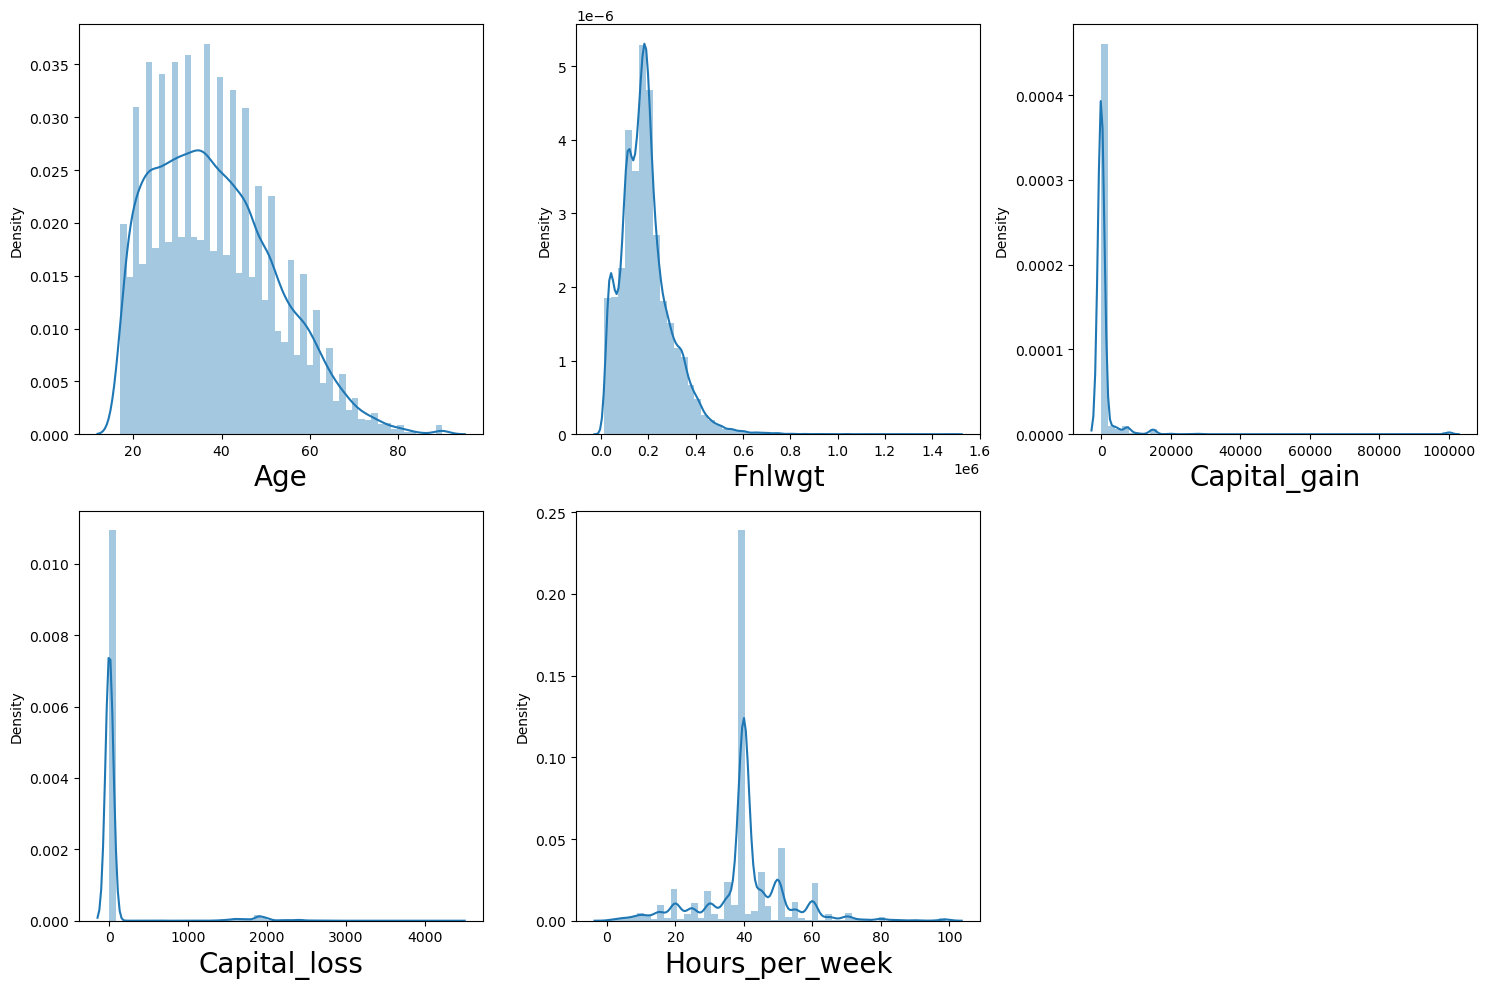

In [8]:
#lets see how data is distributed for each column
plt.figure(figsize=(15,10))
plotnumber = 1
for col in df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnumber<=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# observation
1.Distribution seems good in age column but have right skewed data.

2.rest in all columns it is touching a peak and have some outliers also

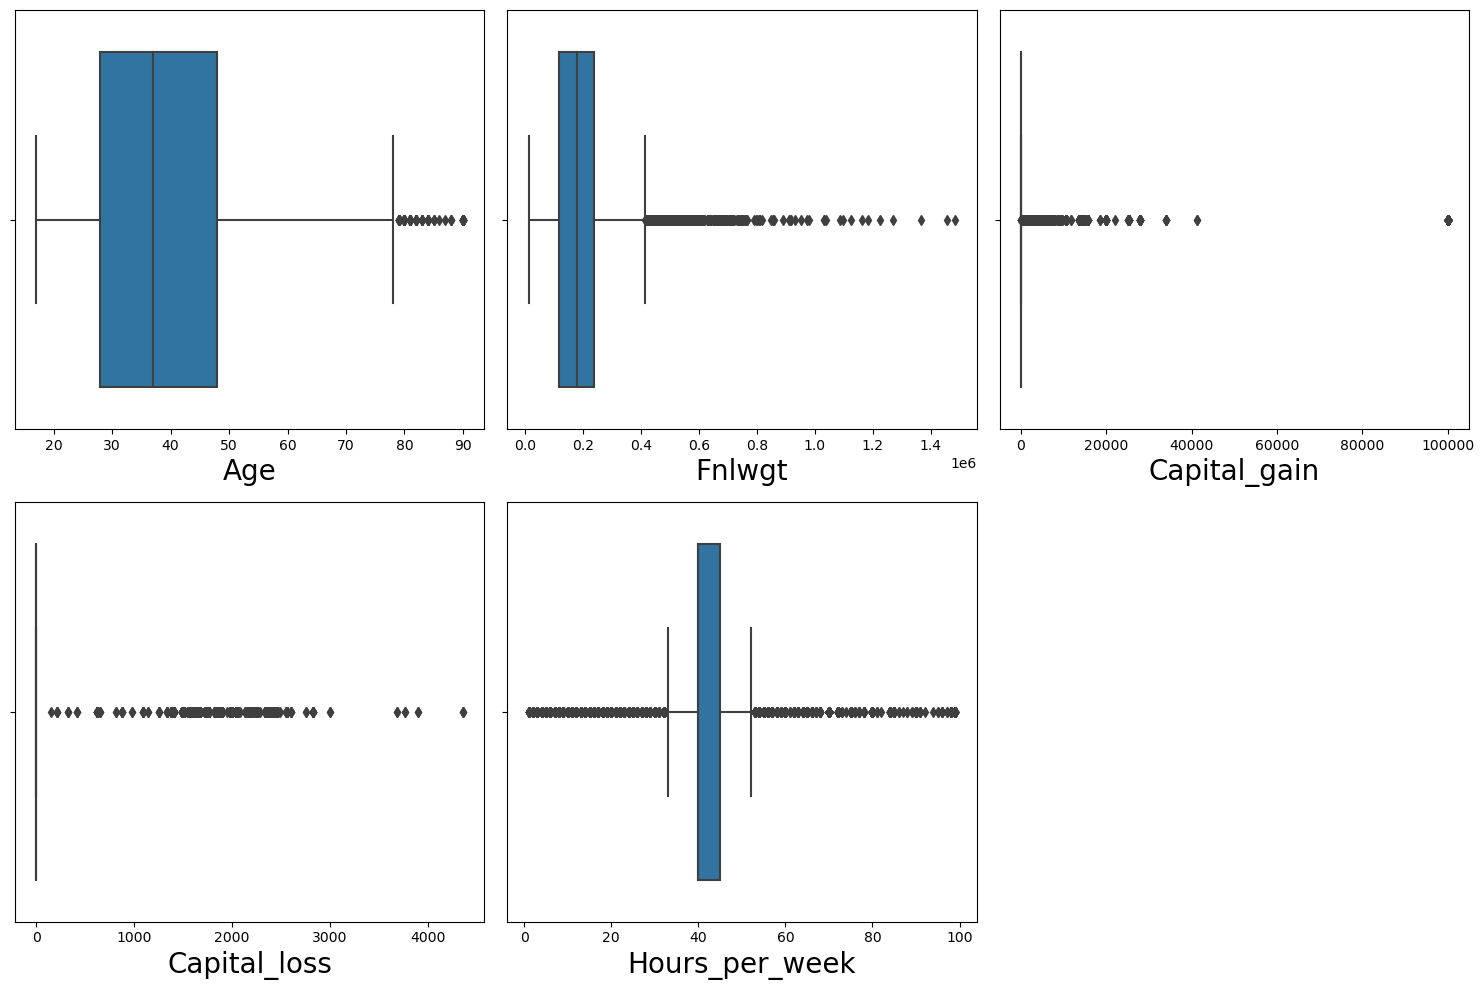

In [9]:
#lets see outliers for each column
plt.figure(figsize=(15,10))
plotnumber = 1
for col in df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnumber<=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation 
There are huge no of outliers in all columns

we will fix them later

In [10]:
#lets encode categorical features using label encoder
from sklearn.preprocessing import LabelEncoder 

In [11]:
for col in df.columns:
    if df[col].dtype == object:
        label = LabelEncoder()
        df[col] = label.fit_transform(df[col])

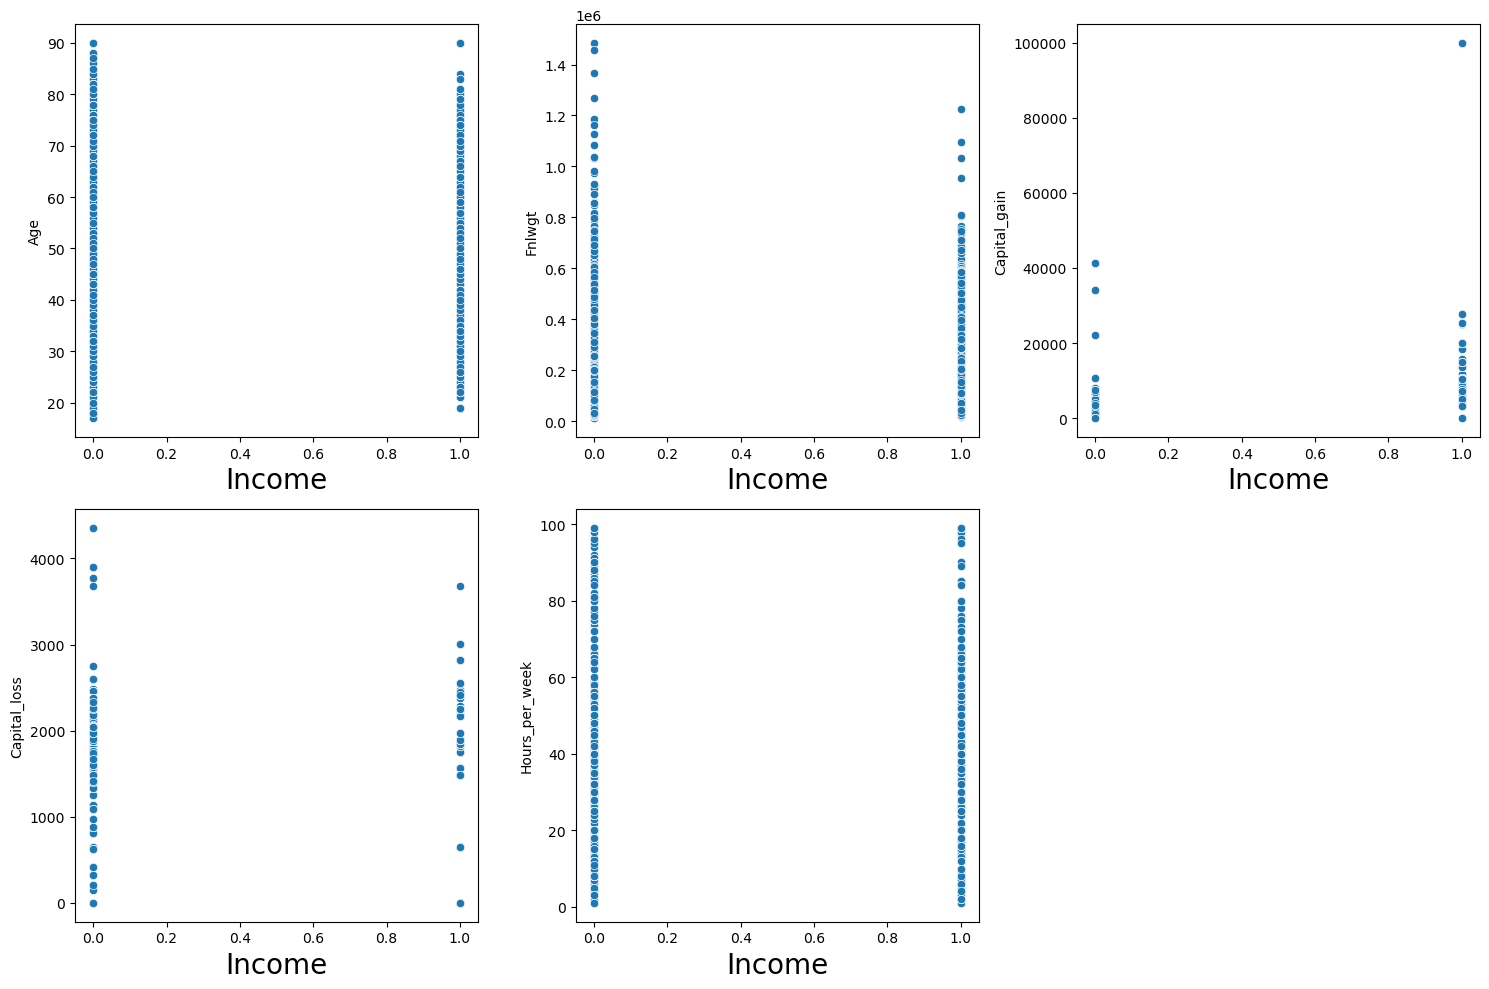

In [12]:
#lets see relation between num column and our target variable
plt.figure(figsize=(15,10))
plotnumber = 1
for col in df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnumber<=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.scatterplot(x=df['Income'],y=df[col],data=df)
        plt.xlabel('Income', fontsize=20)
        plt.ylabel(col,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Observation
Here we can see the relation between our num columns and target

It looks like all are related in some manner.

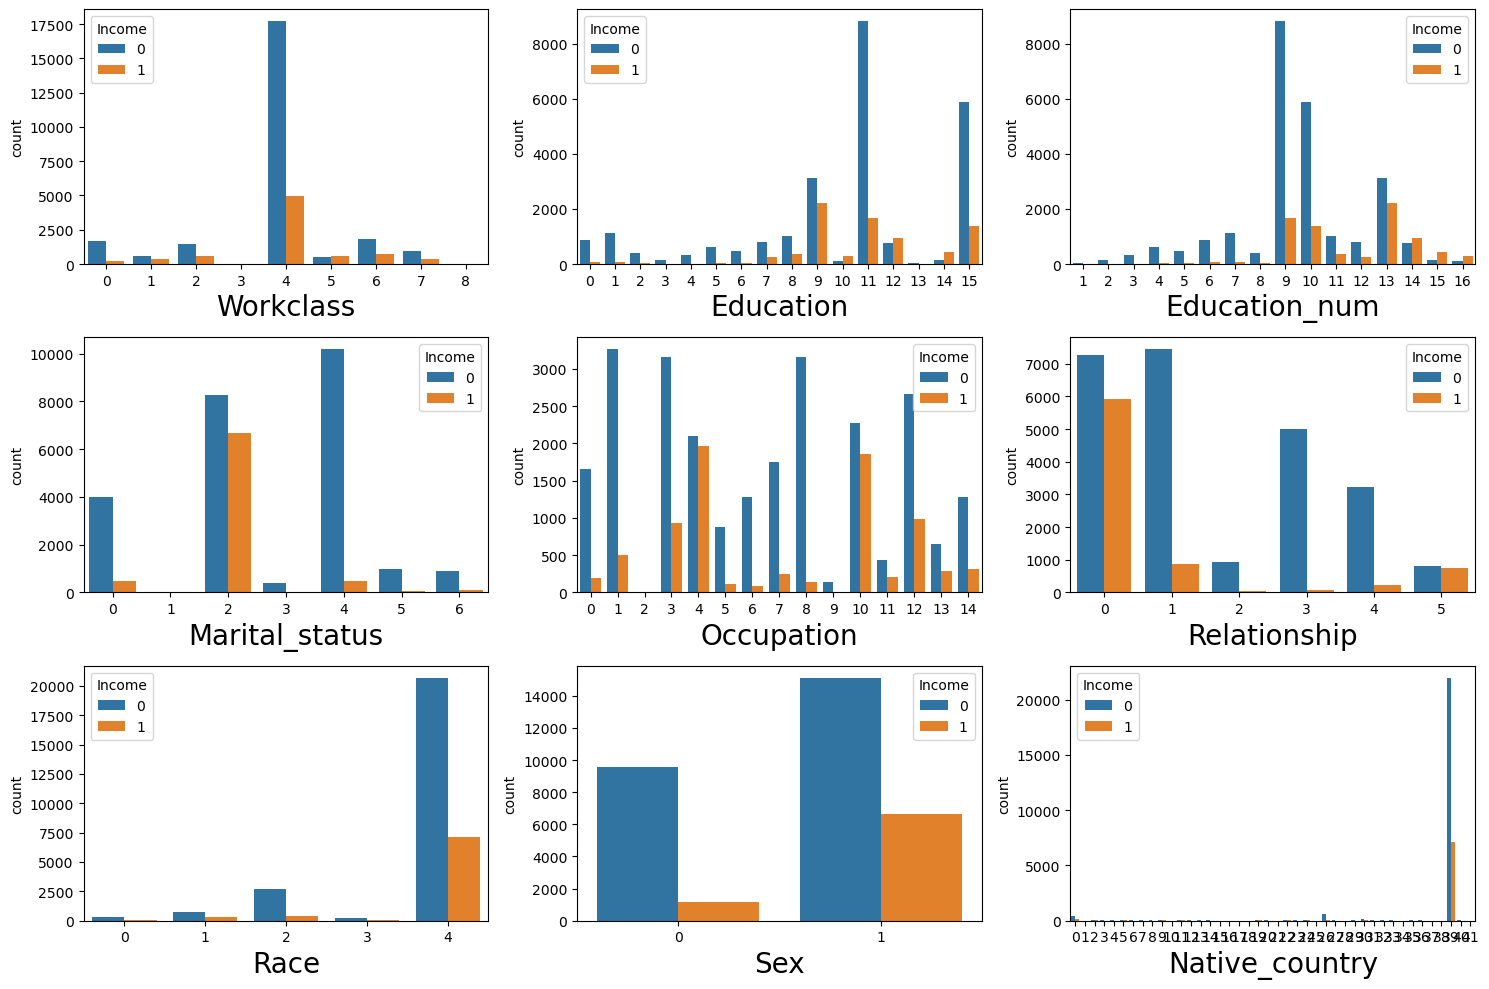

In [13]:
#lets see relation between categorical column and our target variable
plt.figure(figsize=(15,10))
plotnumber = 1
for col in df[['Workclass','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Native_country']]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=df[col],data=df,hue=df['Income'])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
from here we can see the count plot of each cat variable and it's relation with our target variable.

Let's remove outliers

In [14]:
from scipy.stats import zscore

In [15]:
col=df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]
z_score=np.abs(zscore(col))
z_score

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.145969,0.216747,0.035664
2,1.056935,0.425720,0.145969,0.216747,0.035664
3,0.776180,1.408036,0.145969,0.216747,0.035664
4,0.116259,0.898091,0.145969,0.216747,0.035664
...,...,...,...,...,...
32555,0.849505,0.639647,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.145969,0.216747,1.655506


In [16]:
np.where(z_score>3)

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64),
 array([4, 3, 4, ..., 0, 4, 4], dtype=int64))

In [17]:
df1=df[(z_score<3).all(axis=1)]
df1.shape

(30006, 15)

In [18]:
#let's check for dataloss
print('Data loss is :',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss is : 7.77600196705188


# Observation
After removing outliers our data loss is fine. so i m going ahead with this only

In [19]:
#let's check for skewness
df1.skew()

Age                0.489089
Workclass         -0.746734
Fnlwgt             0.634650
Education         -0.927482
Education_num     -0.321906
Marital_status    -0.046984
Occupation         0.119900
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       4.955914
Capital_loss      29.750401
Hours_per_week    -0.349780
Native_country    -3.663267
Income             1.338926
dtype: float64

# Observation 
There is skewness in our data so let's use diff tech to remove skewness

In [20]:
df2=df1.copy()
df2.shape

(30006, 15)

In [21]:
from sklearn.preprocessing import PowerTransformer

In [22]:
features=['Fnlwgt','Capital_gain','Capital_loss']
scale=PowerTransformer()

In [23]:
df1[features]=scale.fit_transform(df1[features].values)

In [24]:
df1.skew()

Age                0.489089
Workclass         -0.746734
Fnlwgt            -0.034764
Education         -0.927482
Education_num     -0.321906
Marital_status    -0.046984
Occupation         0.119900
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       3.081061
Capital_loss      24.943713
Hours_per_week    -0.349780
Native_country    -3.663267
Income             1.338926
dtype: float64

# Observation
Skewness have been reduced but not in capitalgain and capitalloss column

Let's try another tech

In [25]:
df3=df2.copy()
df3.shape

(30006, 15)

In [26]:
#Let's apply log transformation method but before that let's impute 0
df2['Capital_gain']=df2['Capital_gain'].replace(0,df2['Capital_gain'].mean())
df2['Capital_loss']=df2['Capital_loss'].replace(0,df2['Capital_loss'].mean())
#Lets transform using log method
df2['Fnlwgt']=np.log(df2['Fnlwgt'])
df2['Capital_gain']=np.log(df2['Capital_gain'])
df2['Capital_loss']=np.log(df2['Capital_loss'])




In [27]:
df2.skew()

Age                0.489089
Workclass         -0.746734
Fnlwgt            -0.952846
Education         -0.927482
Education_num     -0.321906
Marital_status    -0.046984
Occupation         0.119900
Relationship       0.745512
Race              -2.431482
Sex               -0.681840
Capital_gain       3.532091
Capital_loss      25.200977
Hours_per_week    -0.349780
Native_country    -3.663267
Income             1.338926
dtype: float64

# Observation
In both of the methods skewness have been reduced but in power transformer it is giving good results so i m going with it

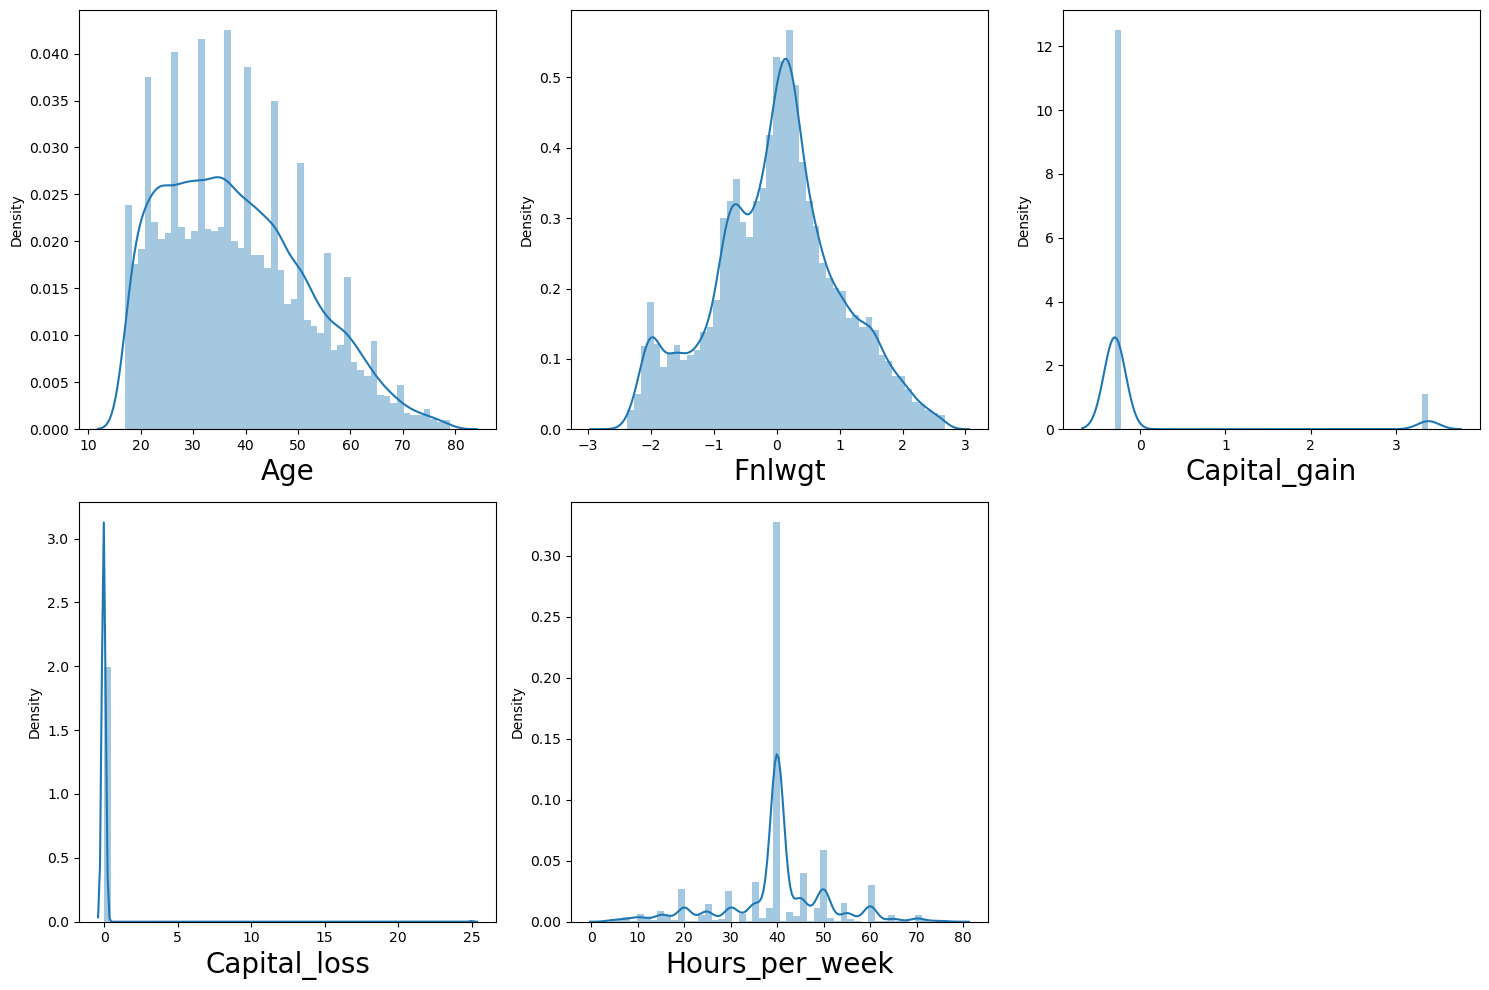

In [28]:
#lets see how data is distributed for each column after removing outliers and skewness
plt.figure(figsize=(15,10))
plotnumber = 1
for col in df1[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnumber<=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

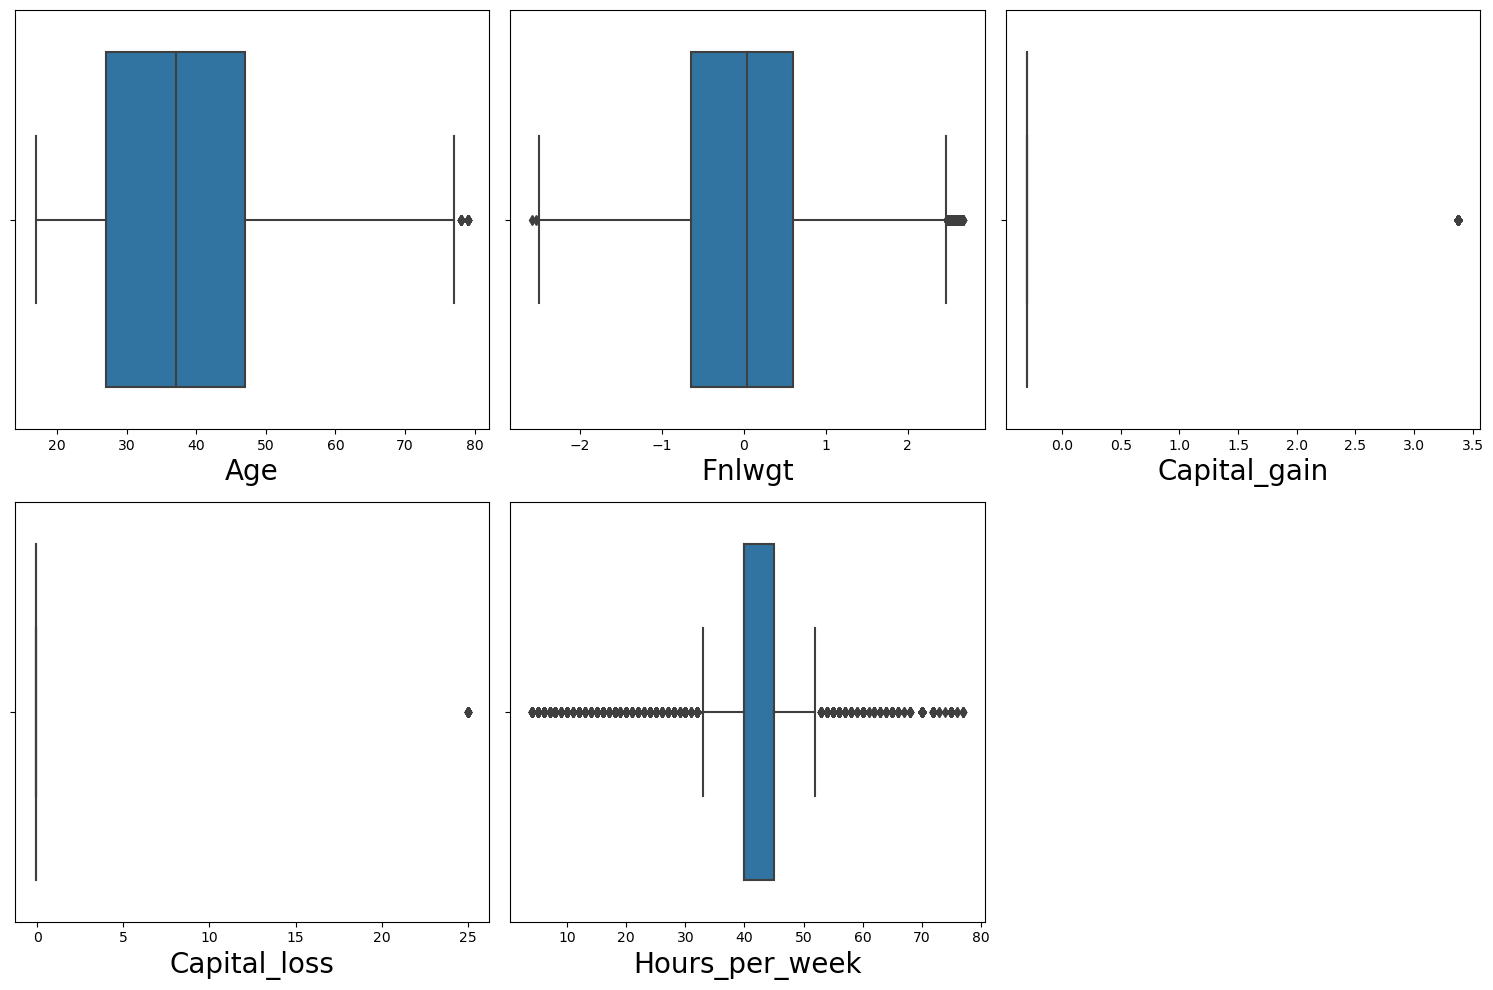

In [29]:
#lets seeagain outliers for each column
plt.figure(figsize=(15,10))
plotnumber = 1
for col in df1[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnumber<=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(df1[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [30]:
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,-1.116187,9,13,2,4,0,4,1,-0.296119,-0.040028,13,39,0
1,38,4,0.422190,11,9,0,6,1,4,1,-0.296119,-0.040028,40,39,0
2,53,4,0.601942,1,7,2,6,0,2,1,-0.296119,-0.040028,40,39,0
3,28,4,1.480433,9,13,2,10,5,2,0,-0.296119,-0.040028,40,5,0
4,37,4,1.042640,12,14,2,4,5,4,0,-0.296119,-0.040028,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,0.806332,7,12,2,13,5,4,0,-0.296119,-0.040028,38,39,0
32556,40,4,-0.211102,11,9,2,7,0,4,1,-0.296119,-0.040028,40,39,1
32557,58,4,-0.238776,11,9,6,1,4,4,0,-0.296119,-0.040028,40,39,0
32558,22,4,0.284060,11,9,4,1,3,4,1,-0.296119,-0.040028,20,39,0


In [31]:
#let's check for corelation
corr=df1.corr()

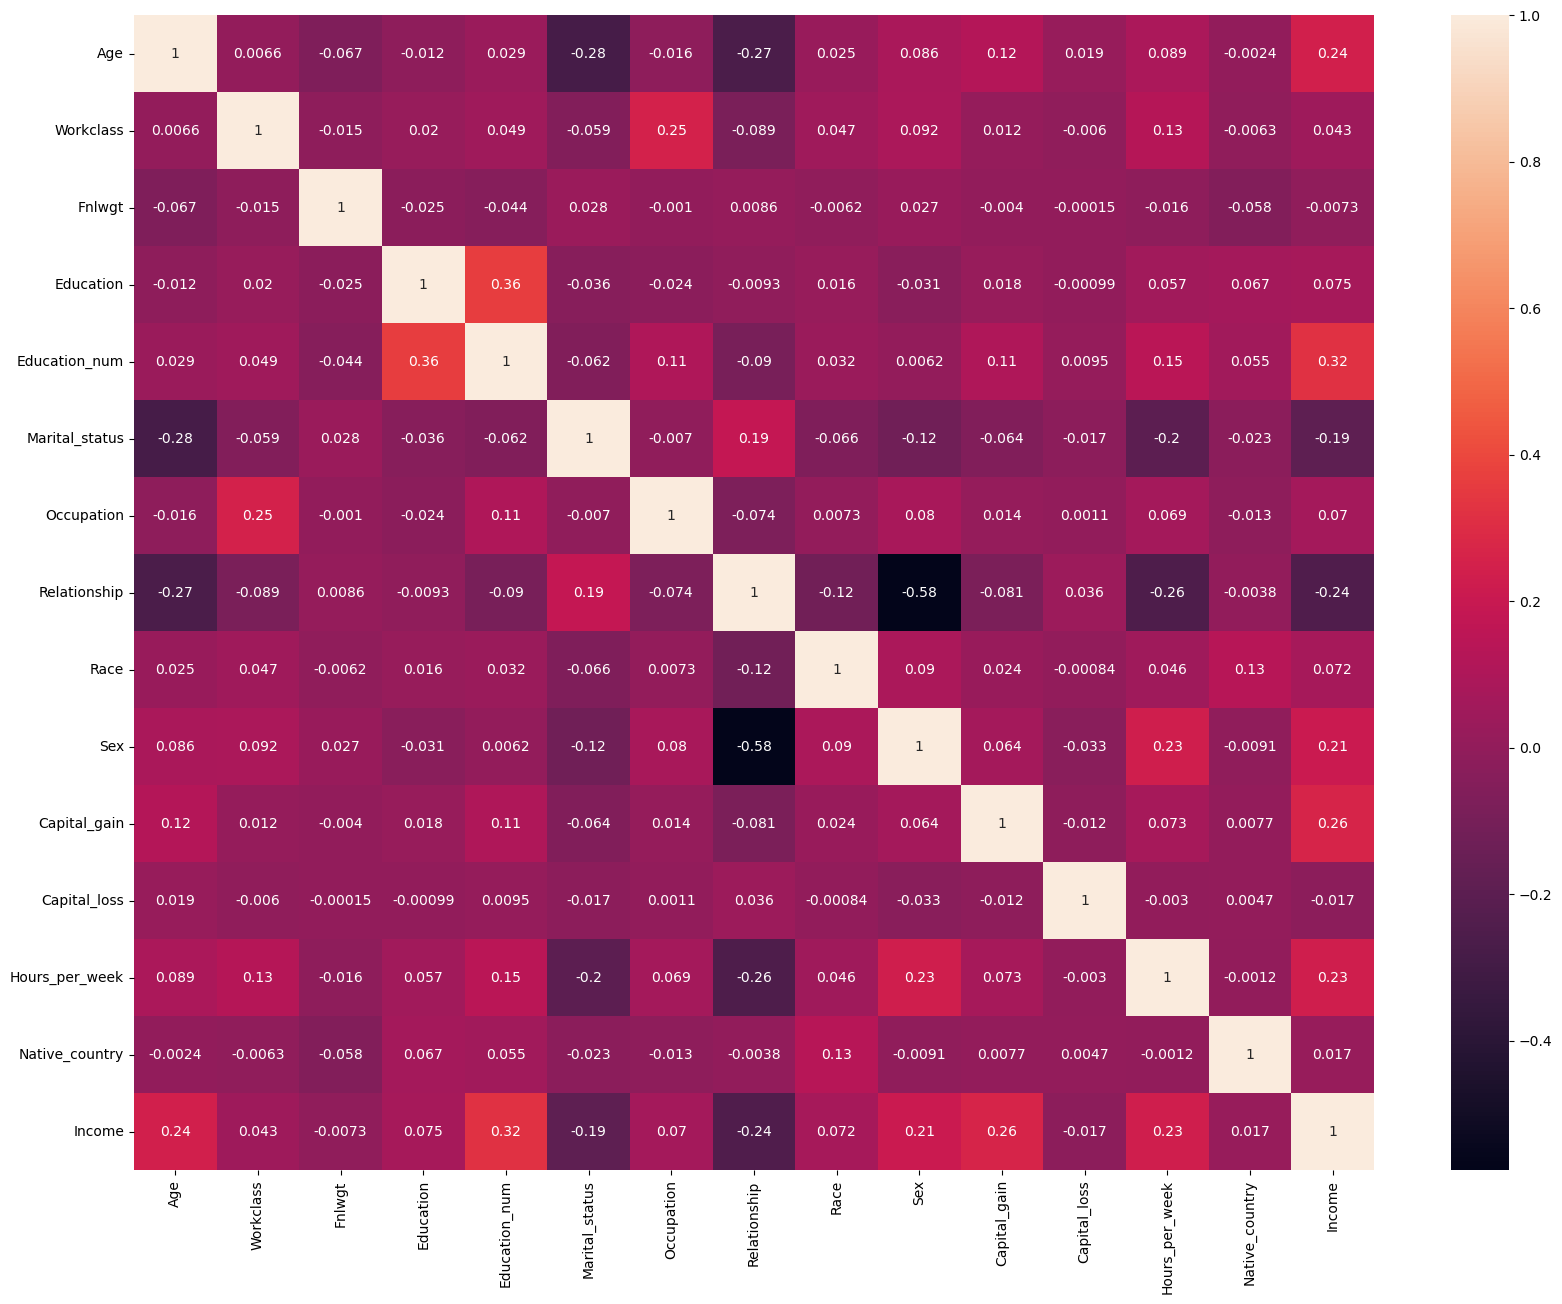

In [32]:
#let's plot heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

# Observation
1.Age,Workclass,Education,Education_num,Occupation,Race,Sex,Capital_gain,capital_loss are positively impacting our label.

2.Fnlwgt,Capital_loss,Native_counry are impacting our label very less.

3.Marital_status,Relationship,are impacting negatively our label column.

We can visualize other relation as well

In [33]:
#lets separate features and label
X=df1.drop('Income',axis=1)
y=df1['Income']

In [34]:
X.shape

(30006, 14)

In [35]:
#now lets standarize our dataset
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

X_scaled

array([[ 0.88268662,  1.4765973 , -1.116187  , ..., -0.04002803,
        -2.41253295,  0.29162308],
       [-0.01434971,  0.0944077 ,  0.42218981, ..., -0.04002803,
         0.01039257,  0.29162308],
       [ 1.1069457 ,  0.0944077 ,  0.60194168, ..., -0.04002803,
         0.01039257,  0.29162308],
       ...,
       [ 1.48071084,  0.0944077 , -0.23877554, ..., -0.04002803,
         0.01039257,  0.29162308],
       [-1.21039815,  0.0944077 ,  0.28405986, ..., -0.04002803,
        -1.78436708,  0.29162308],
       [ 1.03219267,  0.7855025 ,  1.07089102, ..., -0.04002803,
         0.01039257,  0.29162308]])

In [36]:
#let's check for multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features']=X.columns
#let's check for value
vif

,vif,features
0,1.175762,Age
1,1.088846,Workclass
2,1.011114,Fnlwgt
3,1.160646,Education
4,1.209108,Education_num
5,1.137267,Marital_status
6,1.088881,Occupation
7,1.672470,Relationship
8,1.036832,Race
9,1.548354,Sex


# Observation
As vif value is in our threshold range ,there is no multicollinearity issue

let's check feature selection tech

In [38]:
from sklearn.feature_selection import SelectKBest,f_classif

In [39]:
best=SelectKBest(score_func=f_classif,k=13)
fit=best.fit(X_scaled,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature=pd.concat([df_columns,df_scores],axis=1)
feature.columns=['feat_name','Score']
print(feature.nlargest(13,'Score'))

         feat_name        Score
4    Education_num  3355.926906
10    Capital_gain  2211.744234
7     Relationship  1914.107143
0              Age  1777.290972
12  Hours_per_week  1683.735375
9              Sex  1368.951324
5   Marital_status  1179.652028
3        Education   168.406331
8             Race   156.330957
6       Occupation   145.703329
1        Workclass    54.390384
11    Capital_loss     9.044076
13  Native_country     8.544039


# Observation
Here all features are in relation so i m keeping all features and also we have less number of features

# Modelling

In [40]:
#creating training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=11)

In [41]:
#import lib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [42]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("=======Train Result======")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n===Test Result====")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

In [43]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [44]:
metric_score(log,x_train,x_test,y_train,y_test,train=True)
metric_score(log,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:82.21%

===Test Result====
Accuracy Score:82.23%


Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      5871
           1       0.65      0.41      0.50      1631

    accuracy                           0.82      7502
   macro avg       0.75      0.67      0.70      7502
weighted avg       0.81      0.82      0.81      7502



In [45]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [46]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:87.58%

===Test Result====
Accuracy Score:83.22%


Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      5871
           1       0.62      0.58      0.60      1631

    accuracy                           0.83      7502
   macro avg       0.75      0.74      0.75      7502
weighted avg       0.83      0.83      0.83      7502



In [47]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
metric_score(tree,x_train,x_test,y_train,y_test,train=True)
metric_score(tree,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:80.71%


Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      5871
           1       0.55      0.61      0.58      1631

    accuracy                           0.81      7502
   macro avg       0.72      0.73      0.73      7502
weighted avg       0.81      0.81      0.81      7502



In [49]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [50]:
metric_score(bag,x_train,x_test,y_train,y_test,train=True)
metric_score(bag,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:98.65%

===Test Result====
Accuracy Score:84.34%


Test Classification Report
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      5871
           1       0.67      0.55      0.60      1631

    accuracy                           0.84      7502
   macro avg       0.78      0.74      0.75      7502
weighted avg       0.83      0.84      0.84      7502



In [43]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
metric_score(rand,x_train,x_test,y_train,y_test,train=True)
metric_score(rand,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:99.99%

===Test Result====
Accuracy Score:85.42%


Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      5871
           1       0.69      0.60      0.64      1631

    accuracy                           0.85      7502
   macro avg       0.79      0.76      0.78      7502
weighted avg       0.85      0.85      0.85      7502



In [53]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [54]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:86.18%

===Test Result====
Accuracy Score:86.32%


Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      5871
           1       0.73      0.58      0.65      1631

    accuracy                           0.86      7502
   macro avg       0.81      0.76      0.78      7502
weighted avg       0.86      0.86      0.86      7502



In [55]:
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [56]:
metric_score(grad,x_train,x_test,y_train,y_test,train=True)
metric_score(grad,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:86.72%

===Test Result====
Accuracy Score:86.63%


Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      5871
           1       0.74      0.59      0.66      1631

    accuracy                           0.87      7502
   macro avg       0.82      0.77      0.79      7502
weighted avg       0.86      0.87      0.86      7502



In [57]:
support=SVC()
support.fit(x_train,y_train)

SVC()

In [58]:
metric_score(support,x_train,x_test,y_train,y_test,train=True)
metric_score(support,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:84.74%

===Test Result====
Accuracy Score:84.32%


Test Classification Report
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      5871
           1       0.70      0.50      0.58      1631

    accuracy                           0.84      7502
   macro avg       0.78      0.72      0.74      7502
weighted avg       0.83      0.84      0.83      7502



In [59]:
model=xgb.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [60]:
metric_score(model,x_train,x_test,y_train,y_test,train=True)
metric_score(model,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:90.87%

===Test Result====
Accuracy Score:86.46%


Test Classification Report
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      5871
           1       0.71      0.63      0.67      1631

    accuracy                           0.86      7502
   macro avg       0.81      0.78      0.79      7502
weighted avg       0.86      0.86      0.86      7502



# Observation
As per our model performance our Gradient boosting classifier is giving best results with accuracy score of 86.63%

Now let's validate our model performance with cross val score

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
#lets check for log model
pred=log.predict(x_test)
score=cross_val_score(log,X_scaled,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred)-score)

Difference is ; 0.00011170199403720549


In [64]:
#now lets check for knn model
pred2=knn.predict(x_test)
score2=cross_val_score(knn,X_scaled,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred2)-score2)

Difference is ; 0.007876276987192732


In [65]:
#now lets check for decision tree model
pred3=tree.predict(x_test)
score3=cross_val_score(tree,X_scaled,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred3)-score3)

Difference is ; -0.0018534285635373182


In [66]:
#now lets check for bagging model
pred4=bag.predict(x_test)
score4=cross_val_score(bag,X_scaled,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred4)-score4)

Difference is ; -0.001589320873768174


In [47]:
#now lets check for random forest model
pred5=rand.predict(x_test)
score5=cross_val_score(rand,X_scaled,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred5)-score5)

Difference is ; 0.00017632724321214877


In [68]:
#now lets check for ada boost model
pred6=ada.predict(x_test)
score6=cross_val_score(ada,X_scaled,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred6)-score6)

Difference is ; 0.00367484328595602


In [69]:
#now lets check for gradient boost model
pred7=grad.predict(x_test)
score7=cross_val_score(grad,X_scaled,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred7)-score7)

Difference is ; 0.002108325500327246


In [70]:
#now lets check for SVC model
pred8=support.predict(x_test)
score8=cross_val_score(support,X_scaled,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred8)-score8)

Difference is ; 0.0024431371185432704


In [71]:
#now lets check for xgb model
pred9=model.predict(x_test)
score9=cross_val_score(model,X_scaled,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred9)-score9)

Difference is ; -0.0008910179830814435


# Observation
As per our cross val score Logistic regression is giving best results so this is our final model

Now lets use tuning tech to increase our score

In [47]:
from sklearn.model_selection import GridSearchCV

In [54]:
params={
       'C':[2,3,4,5,6,7,8,10,11,12,14,15],
       'random_state':[20,25,30,35,40,45,50,55,60,70,75,80,90,100] 
       } 
grd=GridSearchCV(log,param_grid=params)
grd.fit(x_train,y_train)
print('Best_Parameters ',grd.best_params_)

Best_Parameters  {'C': 2, 'random_state': 20}


In [55]:
final=grd.best_estimator_
final.fit(x_train,y_train)

LogisticRegression(C=2, random_state=20)

In [56]:
metric_score(final,x_train,x_test,y_train,y_test,train=True)
metric_score(final,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:82.21%

===Test Result====
Accuracy Score:82.23%


Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      5871
           1       0.65      0.41      0.50      1631

    accuracy                           0.82      7502
   macro avg       0.75      0.67      0.70      7502
weighted avg       0.81      0.82      0.81      7502



# Observation
After using tuning tech our score is not increasing so this is our final model

In [57]:
#lets check roc ,auc score
from sklearn.metrics import roc_curve,roc_auc_score

In [61]:
fpr,tpr,thresholds=roc_curve(y_test,pred)

In [62]:
print('threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False Positive Rate=',fpr)

threshold= [2 1 0]
True Positive Rate= [0.         0.40588596 1.        ]
False Positive Rate= [0.         0.06199966 1.        ]


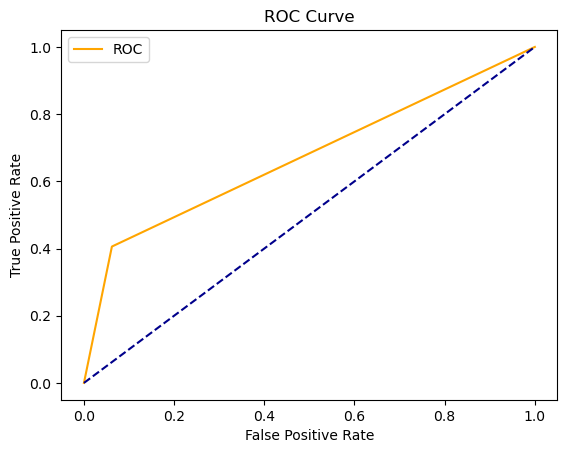

In [63]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
    

In [64]:
#Let's check auc score
auc_score=roc_auc_score(y_test,pred)
print(auc_score*100)

67.19431500957486


In [65]:
#now lets save model using joblib
import joblib

In [66]:
joblib.dump(final,'CensusIncomePredictionModel.obj')

['CensusIncomePredictionModel.obj']